## Predicting molecule solubility using graph neural networks

The utilization of graph-based frameworks within the torch_geometric library is instrumental for harnessing the power of graph neural networks (GNNs). These advanced networks adeptly process the graph representations of molecules, which are meticulously constructed with atoms as nodes and bonds as edges. GNNs excel in interpreting the intricate web of atomic interactions and the rich feature set of both nodes and edges. By doing so, they can adeptly predict solubility among other pivotal chemical attributes, leveraging the inherent structural information of the compounds.


**ESOL Dataset Overview:** The ESOL (Extended Solubility) dataset is pivotal in cheminformatics and predictive analytics, offering solubility data for a range of organic molecules in aqueous environments.</br>
**Molecular Graphs:** Molecules are depicted as graphs with atoms as nodes and bonds as edges, encapsulating the molecular structure and atom connectivity.</br>
**Atom Attributes:** Nodes carry distinct attributes reflecting atomic characteristics such as element type, electric charge distribution, hybridization state, atomic weight, and formal charge.</br>
**Bond Characteristics:** Edges in the graph hold data on bond types—whether single, double, or triple—and may include geometric details like bond lengths and angles.</br>
Structural Encoding: The molecular framework is encoded via adjacency matrices or edge lists, outlining the bond linkages among atoms.

## Investigate the dataset



In [1]:
!pip install torch
!pip install torch-geometric
!pip install rdkit
import rdkit
from torch_geometric.datasets import MoleculeNet

# https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.MoleculeNet.html#torch_geometric.datasets.MoleculeNet
DATA = MoleculeNet(root=".", name="ESOL")
DATA

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Processing...
Done!


ESOL(1128)

**!pip install torch:** This command installs the PyTorch library, a popular open-source machine learning library for Python.</br>

**!pip install torch-geometric:** This command installs the PyTorch Geometric (PyG) library, which is an extension library for PyTorch dedicated to geometric deep learning, such as graph neural networks.</br>

**!pip install rdkit:** This command installs the RDKit library, an open-source cheminformatics software that provides tools for the chemistry domain, like handling molecular structures.
import rdkit: This line imports the RDKit library into your Python script.</br>

**from torch_geometric.datasets import MoleculeNet:** This line imports the MoleculeNet dataset from the torch_geometric.datasets module.</br>

**DATA = MoleculeNet(root=".", name="ESOL"):** This line loads the ESOL dataset from MoleculeNet and stores it in the variable DATA.
The MoleculeNet dataset is a large-scale benchmark for molecular machine learning1. It curates multiple public datasets, establishes metrics for evaluation, and offers high-quality open-source implementations of multiple previously proposed molecular featurization and learning algorithms.</br>

The ESOL dataset, specifically, is a small dataset consisting of water solubility data for 1128 compounds2. The dataset has been used to train models that estimate solubility directly from chemical structures (as encoded in SMILES strings). It is made up of water solubility data (log solubility in mols per litre) for common organic small molecules.</br>

In [2]:
print("Dataset type: ", type(DATA))
print("Number of features per graph node: ", DATA.num_features)
print("Number of distinct target values (solubilities): ", DATA.num_classes)
print("Number of graphs: ", len(DATA))
print("Example graph: ", DATA[0])
print("Number of nodes in example graph: ", DATA[0].num_nodes)
print("Number of edges in example graph: ", DATA[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Number of features per graph node:  9
Number of distinct target values (solubilities):  734
Number of graphs:  1128
Example graph:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Number of nodes in example graph:  32
Number of edges in example graph:  68


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


1. `print("Dataset type: ", type(DATA))`: This line prints the type of the `DATA` object. It's expected to be a `torch_geometric.data.dataset.Dataset` object, which is the base class for all graph datasets in PyTorch Geometric.

2. `print("Number of features per graph node: ", DATA.num_features)`: This line prints the number of features per node in the graphs of the `DATA` dataset. Each node in a graph can have multiple features, such as atomic number, atomic mass, etc., in a molecular graph.

3. `print("Number of distinct target values (solubilities): ", DATA.num_classes)`: This line prints the number of distinct target values in the `DATA` dataset. In the context of the `ESOL` dataset, this would be the number of distinct solubility values.

4. `print("Number of graphs: ", len(DATA))`: This line prints the total number of graphs in the `DATA` dataset. Each graph represents a different molecule.

5. `print("Example graph: ", DATA[0])`: This line prints the details of the first graph in the `DATA` dataset.

6. `print("Number of nodes in example graph: ", DATA[0].num_nodes)`: This line prints the number of nodes in the first graph of the `DATA` dataset. Each node represents an atom in the molecule.

7. `print("Number of edges in example graph: ", DATA[0].num_edges)`: This line prints the number of edges in the first graph of the `DATA` dataset. Each edge represents a bond between two atoms in the molecule.

In summary, this code is exploring the `ESOL` dataset from `MoleculeNet`. It prints out the type of the dataset, the number of features per node, the number of distinct target values (solubilities), the total number of graphs in the dataset, and some details about the first graph in the dataset. This information is useful for understanding the structure and content of the dataset before using it for machine learning tasks.

In [3]:
# nodes of example graph
DATA[0].x # shape: [num_nodes, num_node_features]

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

The line DATA[0].x is used to access the node features of the first graph in the DATA dataset. In the context of the ESOL dataset, each node represents an atom in a molecule, and the features could be properties of the atoms like atomic number, atomic mass, etc.

The shape of DATA[0].x is [num_nodes, num_node_features], where num_nodes is the number of nodes (atoms) in the first graph (molecule), and num_node_features is the number of features for each node (atom).

So, if you print DATA[0].x, it will output a 2D tensor where each row represents a node (atom) and each column in a row represents a feature of that node (atom). The number of rows is equal to the number of nodes in the graph, and the number of columns is equal to the number of features per node. This tensor is used as input to graph neural networks for tasks like node classification, link prediction, etc. in the field of geometric deep learning.

In [4]:
# the target value of the example graph is its solubility
DATA[0].y

tensor([[-0.7700]])

The line `DATA[0].y` is used to access the target value of the first graph in the `DATA` dataset. In the context of the `ESOL` dataset, the target value is the solubility of the molecule represented by the graph.

The `y` attribute of a graph in the `MoleculeNet` dataset represents the target value or label associated with the graph. For the `ESOL` dataset, this target value is the solubility of the molecule in water. This value is what you would typically try to predict in a machine learning task using the `MoleculeNet` dataset.

So, if you print `DATA[0].y`, it will output the solubility of the first molecule in the dataset. This solubility value is typically used as the ground truth or label when training a machine learning model to predict molecular solubility from graph representations of molecules.


In [5]:
# the edges of the example graph are in sparse Coordinate Format (COO)
# (also called adjacency list: https://distill.pub/2021/gnn-intro/
DATA[0].edge_index.t() # shape [num_edges, 2]

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [6]:
# edge attributes of example graph
DATA[0].edge_attr # shape [num_edges, num_edge_features]

tensor([[ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 3,  0,  0],
        [ 3,  0,  0],
        [ 1,  0,  0],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  0],
        [ 

The line `DATA[0].edge_attr` is used to access the edge attributes of the first graph in the `DATA` dataset.

In the context of the `ESOL` dataset and graph neural networks, each edge represents a bond between two atoms (nodes) in a molecule (graph). The `edge_attr` attribute of a graph is a 2D tensor of shape `[num_edges, num_edge_features]`, where `num_edges` is the number of edges in the graph and `num_edge_features` is the number of features for each edge.

Each edge in a graph can have multiple features. For example, in a molecular graph, edge features could represent bond type (single, double, triple), bond length, bond angle, etc.

So, if you print `DATA[0].edge_attr`, it will output a 2D tensor where each row represents an edge (bond) in the first graph (molecule) of the dataset, and each column in a row represents a feature of that edge (bond). This tensor is used as input to graph neural networks for tasks like node classification, link prediction, etc. in the field of geometric deep learning.


## Visualize one of the molecules in the dataset

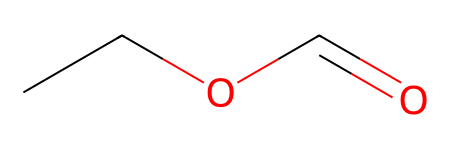

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles(DATA[1000]["smiles"])


1. `from rdkit import Chem`: This line imports the `Chem` module from the RDKit library. The `Chem` module provides a range of tools for chemistry, including the ability to create, manipulate and visualize molecular structures.

2. `from rdkit.Chem.Draw import IPythonConsole`: This line imports the `IPythonConsole` module from `rdkit.Chem.Draw`. The `IPythonConsole` module allows RDKit to draw molecules directly in an IPython notebook.

3. `Chem.MolFromSmiles(DATA[1000]["smiles"])`: This line creates a molecule object from a SMILES string. SMILES (Simplified Molecular Input Line Entry System) is a specification for unambiguously describing the structure of chemical molecules using short ASCII strings. `DATA[1000]["smiles"]` retrieves the SMILES string of the 1001st molecule in the `DATA` dataset. `Chem.MolFromSmiles` then converts this SMILES string into a molecule object that can be manipulated and visualized using RDKit.

In summary, this code is visualizing the structure of the 1001st molecule in the `ESOL` dataset using RDKit.


## Implement a Graph Convolutional Neural Network

In [8]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

EMBEDDING_DIM = 64

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = GCNConv( # The graph convolutional operator from the “Semi-supervised Classification with Graph Convolutional Networks” paper
          in_channels=DATA.num_features, # number of features per node of graph before transformation
          out_channels=EMBEDDING_DIM # number of features per node of graph after transformation
        )
        self.conv1 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.conv2 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.conv3 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.out = Linear(
          in_features=EMBEDDING_DIM*2, # we stack the different global pooling aggregations below
          out_features=1
        )

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # Global Pooling (stack different aggregations over nodes of graph)
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

MODEL = GCN()
print(MODEL)
print("Number of parameters: ", sum(p.numel() for p in MODEL.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


1. `class GCN(torch.nn.Module)`: This line defines a new class `GCN` that inherits from `torch.nn.Module`. In PyTorch, a model is defined by subclassing the `torch.nn.Module` class.

2. `self.initial_conv = GCNConv(...)`: This line defines the initial graph convolutional layer. The `GCNConv` class implements the graph convolutional operator from the "Semi-supervised Classification with Graph Convolutional Networks" paper. The input to this layer is the number of features per node in the input graph (`DATA.num_features`), and the output is a user-defined number of features (`EMBEDDING_DIM`).

3. `self.conv1, self.conv2, self.conv3`: These lines define additional graph convolutional layers. Each layer takes as input the output of the previous layer (or the initial layer), applies a graph convolution, and outputs a new set of features per node.

4. `self.out = Linear(...)`: This line defines a linear layer that takes as input the output of the last graph convolutional layer and outputs a single value. This value is the prediction of the model.

5. `def forward(self, x, edge_index, batch_index)`: This method defines the forward pass of the model. It takes as input a batch of graphs (represented by their node features `x`, their edge indices `edge_index`, and a batch index `batch_index`), applies the graph convolutional layers and the linear layer, and outputs a prediction for each graph in the batch.

6. `MODEL = GCN()`: This line creates an instance of the `GCN` class.

7. `print(MODEL)`: This line prints the architecture of the model.

8. `print("Number of parameters: ", sum(p.numel() for p in MODEL.parameters()))`: This line prints the total number of parameters in the model.

In summary, this code defines a GCN model for predicting properties of molecules, creates an instance of this model, and prints the model's architecture and number of parameters.

## Train the Graph Convolutional Network

In [9]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

NUM_GRAPHS_PER_BATCH = 64

# Use GPU for training (if available)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

1. `from torch_geometric.data import DataLoader`: This line imports the `DataLoader` class from the `torch_geometric.data` module. The `DataLoader` is a PyTorch utility for loading and batching data in parallel.

2. `import warnings`: This line imports the `warnings` module, which is used to control how warnings are displayed.

3. `warnings.filterwarnings("ignore")`: This line suppresses the display of warnings. This can be useful to keep the output clean in a production environment, but it's generally recommended to keep warnings visible during development as they can highlight potential issues.

4. `NUM_GRAPHS_PER_BATCH = 64`: This line sets the number of graphs that will be loaded in each batch during training. Batching allows the model to train on multiple examples at once, which can speed up training and make better use of GPU resources.

5. `DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")`: This line sets the device where the computations will be performed. If a CUDA-compatible GPU is available (`torch.cuda.is_available()` returns `True`), it sets the device to the first GPU (`cuda:0`). Otherwise, it sets the device to the CPU. Using a GPU can significantly speed up computations.

In summary, this code is setting up the data loading and device for training a GCN model using PyTorch and PyTorch Geometric.

In [10]:
def train(model, data):
  model = model.to(DEVICE)

  loss_fn = torch.nn.MSELoss()

  optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

  data_size = len(data)
  train_loader = DataLoader(
    data[:int(data_size * 0.8)],
    batch_size=NUM_GRAPHS_PER_BATCH,
    shuffle=True
  )

  for batch in train_loader:
    # Use GPU
    batch.to(DEVICE)
    # Reset gradients
    optimizer.zero_grad()
    # Passing the node features and the edge info
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
    # Calculating the loss and gradients
    loss = loss_fn(pred, batch.y)
    loss.backward()
    # Update using the gradients
    optimizer.step()
  return loss, embedding

def train_wrapper():
  print("Starting training...")
  losses = []
  for epoch in range(2000):
      loss, h = train(MODEL, DATA)
      losses.append(loss)
      if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss {loss}")
  return losses

LOSSES = train_wrapper()

Starting training...
Epoch 0 | Train Loss 11.665949821472168
Epoch 100 | Train Loss 1.032310962677002
Epoch 200 | Train Loss 2.338195562362671
Epoch 300 | Train Loss 0.220626100897789
Epoch 400 | Train Loss 0.1796690970659256
Epoch 500 | Train Loss 0.2943800389766693
Epoch 600 | Train Loss 0.08013196289539337
Epoch 700 | Train Loss 0.11260401457548141
Epoch 800 | Train Loss 0.21036823093891144
Epoch 900 | Train Loss 0.06599634140729904
Epoch 1000 | Train Loss 0.046364620327949524
Epoch 1100 | Train Loss 0.05885403975844383
Epoch 1200 | Train Loss 0.061202432960271835
Epoch 1300 | Train Loss 0.05776737630367279
Epoch 1400 | Train Loss 0.20312468707561493
Epoch 1500 | Train Loss 0.014425194822251797
Epoch 1600 | Train Loss 0.10018693655729294
Epoch 1700 | Train Loss 0.0032326774671673775
Epoch 1800 | Train Loss 0.05969895422458649
Epoch 1900 | Train Loss 0.05836554244160652


1. `def train(model, data)`: This function defines the training process for a single epoch. It takes as input a model and a dataset.

2. `model = model.to(DEVICE)`: This line moves the model to the device where the computations will be performed (either a GPU or CPU).

3. `loss_fn = torch.nn.MSELoss()`: This line defines the loss function to be used during training. In this case, Mean Squared Error (MSE) loss is used, which is commonly used for regression tasks.

4. `optimizer = torch.optim.Adam(...)`: This line defines the optimizer to be used during training. In this case, the Adam optimizer is used.

5. `train_loader = DataLoader(...)`: This line creates a DataLoader, which is a PyTorch utility for loading and batching data in parallel.

6. The `for` loop iterates over each batch in the DataLoader. For each batch, it moves the batch to the device, performs a forward pass through the model, computes the loss, performs a backward pass to compute the gradients, and updates the model parameters using the optimizer.

7. `def train_wrapper()`: This function wraps the training process for multiple epochs. It prints the training progress and stores the loss for each epoch.

8. `LOSSES = train_wrapper()`: This line starts the training process and stores the losses for each epoch.

In summary, this code is defining and starting the training process for a GCN model using PyTorch and PyTorch Geometric.

## Visualize training loss


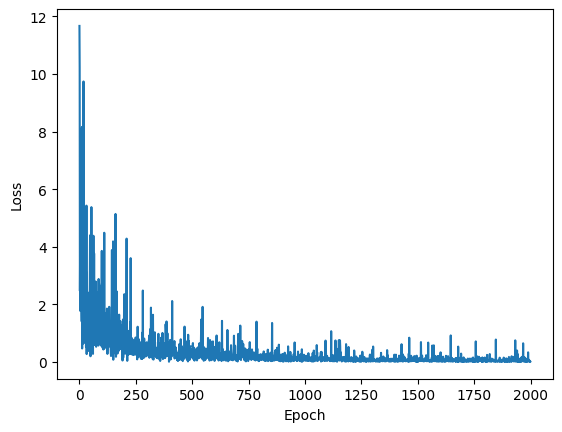

In [11]:
import seaborn as sns

def plot_train_loss():
  losses_float = [float(loss.cpu().detach().numpy()) for loss in LOSSES]
  loss_indices = range(len(losses_float))
  ax = sns.lineplot(x=loss_indices, y=losses_float)
  ax.set(xlabel='Epoch', ylabel='Loss')

plot_train_loss()

1. `import seaborn as sns`: This line imports the Seaborn library, a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

2. `def plot_train_loss()`: This function defines the process of plotting the training loss.

3. `losses_float = [float(loss.cpu().detach().numpy()) for loss in LOSSES]`: This line converts the loss for each epoch from a PyTorch tensor to a Python float. The `cpu()` function moves the tensor to the CPU (if it's not already there), the `detach()` function detaches the tensor from the computation graph (so gradients are not tracked), and the `numpy()` function converts the tensor to a NumPy array.

4. `loss_indices = range(len(losses_float))`: This line creates a list of indices for the epochs. The length of this list is the same as the length of `losses_float`.

5. `ax = sns.lineplot(x=loss_indices, y=losses_float)`: This line creates a line plot with epoch indices on the x-axis and training loss values on the y-axis.

6. `ax.set(xlabel='Epoch', ylabel='Loss')`: This line sets the labels of the x-axis and y-axis of the plot.

7. `plot_train_loss()`: This line calls the `plot_train_loss` function to plot the training loss.

In summary, this code is used to visualize the training loss of the GCN model over epochs, which can be useful for understanding how the model is learning and whether or not it's converging.

## Predict solubility on test data and compare with true solubilities

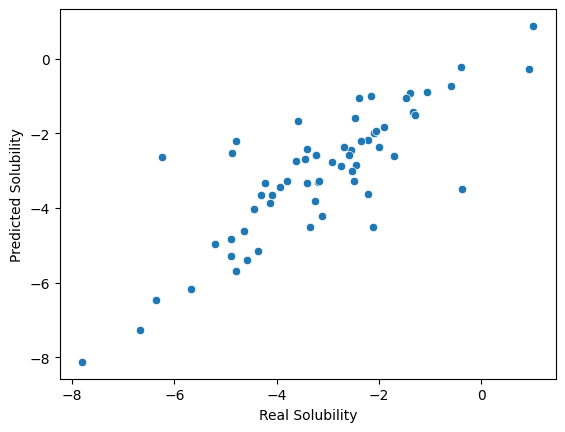

In [12]:
import pandas as pd

def predict(model, data):
  data_size = len(data)
  test_loader = DataLoader(
    data[int(data_size * 0.8):],
    batch_size=NUM_GRAPHS_PER_BATCH,
    shuffle=True
  )

  # Analyze the results for one batch
  test_batch = next(iter(test_loader))

  with torch.no_grad():
    test_batch.to(DEVICE)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()

  df["y_real"] = df["y_real"].apply(lambda row: row[0])
  df["y_pred"] = df["y_pred"].apply(lambda row: row[0])

  axes = sns.scatterplot(data=df, x="y_real", y="y_pred")
  axes.set_xlabel("Real Solubility")
  axes.set_ylabel("Predicted Solubility")

predict(MODEL, DATA)

1. `def predict(model, data)`: This function defines the prediction process. It takes as input a model and a dataset.

2. `test_loader = DataLoader(...)`: This line creates a DataLoader for the test data, which is the last 20% of the dataset.

3. `test_batch = next(iter(test_loader))`: This line retrieves the first batch from the test DataLoader.

4. `with torch.no_grad()`: This context manager is used to disable gradient calculations during the prediction phase, which can save memory.

5. `pred, embed = model(...)`: This line performs a forward pass through the model using the test batch and retrieves the predictions and the embeddings.

6. `df = pd.DataFrame()`: This line creates a new pandas DataFrame to store the real and predicted solubility values.

7. `df["y_real"] = test_batch.y.tolist()`: This line adds the real solubility values to the DataFrame.

8. `df["y_pred"] = pred.tolist()`: This line adds the predicted solubility values to the DataFrame.

9. `df["y_real"] = df["y_real"].apply(lambda row: row[0])`: This line converts the real solubility values from lists to single values.

10. `df["y_pred"] = df["y_pred"].apply(lambda row: row[0])`: This line converts the predicted solubility values from lists to single values.

11. `axes = sns.scatterplot(data=df, x="y_real", y="y_pred")`: This line creates a scatter plot with the real solubility values on the x-axis and the predicted solubility values on the y-axis.

12. `axes.set_xlabel("Real Solubility")` and `axes.set_ylabel("Predicted Solubility")`: These lines set the labels of the x-axis and y-axis of the plot.

In summary, this code is defining the prediction process for a GCN model, making predictions on a test batch, and visualizing the real vs predicted solubility values.